In [113]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split # Spliting the data into Traing and Validation Set
from sklearn.metrics import confusion_matrix # To check the similarity between Predictions and Answers
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential,Model # To create a Series wise CNN
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,Input  # Layers to be used in CNN(Keras) Model
from keras.optimizers import RMSprop # Optimizer which will help us finds the apt parameters
from keras.preprocessing.image import ImageDataGenerator # Creates an Augmented Image
from keras.callbacks import ReduceLROnPlateau # For preventing Overfitting an also increasing the precision

from PIL import Image

from zipfile import ZipFile
#from io import BytesIO
archieve_train = ZipFile("train.zip",'r')

In [2]:
train = pd.read_csv('labels.csv')

In [121]:
train.describe(include=['O'])

,id,breed
count,10222,10222
unique,10222,120
top,606d240b00e70b88b9d7694a8082424f,scottish_deerhound
freq,1,126


In [136]:
Y = train['breed']

In [132]:
Id[234]

'train/056c314f2a7d119447af259a07eb31df.jpg'

In [138]:
Names = pd.unique(Y) # Gives all the unique character in a DataFrame

In [141]:
Names.sort()

In [145]:
Tag = np.arange(120)

In [163]:
Tag = Tag 

In [173]:
Y_train = np.zeros([num,1])

In [179]:
for i in range(num):
    for j in range(120):
        if Y[i] == Names[j]:
            Y_train[i] = int(Tag[j])

In [187]:
for i in range(10):
    print(Names[int(Y_train[i])])

boston_bull
dingo
pekinese
bluetick
golden_retriever
bedlington_terrier
bedlington_terrier
borzoi
basenji
scottish_deerhound


In [189]:
Y_onehot = to_categorical(Y_train,num_classes=120)

In [192]:
Y_onehot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)

In [171]:
Tag

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119])

In [172]:
Names

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

# Collecting Database

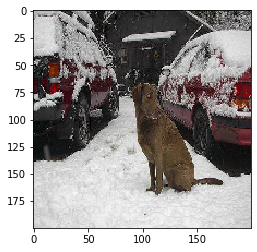

In [112]:
num = len(archieve_train.namelist())
Id = []
database= np.zeros([num,200,200,3])
for i in range(num):
    name = archieve_train.namelist()[i]
    image = Image.open(name)
    image = image.resize((200,200))
    pixel = np.array(image)
    plt.imshow(pixel)
    database[i,:,:,:]=(pixel)/255
    Id.append(name)

In [194]:
database.shape

(10222, 200, 200, 3)

In [195]:
Y_onehot.shape

(10222, 120)

In [202]:
database[0][:,:].shape

(200, 200, 3)

# Model


In [201]:
def model(input_shape):
    Xinput = Input(input_shape)
    X = Conv2D(filters=32,kernel_size =(5,5),padding='Same',strides = (1,1),activation = 'relu')(Xinput)
    X = Conv2D(filters=32,kernel_size =(5,5),padding='Same',strides = (1,1),activation = 'relu')(X)
    X = Conv2D(filters=32,kernel_size =(5,5),padding='Same',strides = (1,1),activation = 'relu')(X)
    X = MaxPool2D(pool_size = (2,2))(X)
    X = Dropout(0.25)(X)
    X = Dropout(0.25)(X)
    
    X = Conv2D(filters=32,kernel_size =(5,5),padding='Same',strides = (1,1),activation = 'relu')(X)
    X = Conv2D(filters=32,kernel_size =(5,5),padding='Same',strides = (1,1),activation = 'relu')(X)
    X = Conv2D(filters=32,kernel_size =(5,5),padding='Same',strides = (1,1),activation = 'relu')(X)
    X = MaxPool2D(pool_size = (2,2),strides=(2,2))(X)
    X = Dropout(0.25)(X)
    X = Dropout(0.25)(X)
    
    X = Conv2D(filters=64,kernel_size =(5,5),padding='Same',strides = (1,1),activation = 'relu')(X)
    X = Conv2D(filters=64,kernel_size =(5,5),padding='Same',strides = (1,1),activation = 'relu')(X)
    X = Conv2D(filters=64,kernel_size =(5,5),padding='Same',strides = (1,1),activation = 'relu')(X)
    X = MaxPool2D(pool_size = (2,2),strides=(2,2))(X)
    X = Dropout(0.25)(X)
    X = Dropout(0.25)(X)
    
    X = Flatten()(X)
    X = Dense(512,activation = 'relu')(X)
    X = Dropout(0.5)(X)
    X = Dense(120,activation = 'softmax')(X)
    
    model = Model(inputs = Xinput,outputs = X, name = 'My_second_ConvNet')
    
    return model

In [203]:
input_size = database[0][:,:].shape
Breed = model(input_size) # Creating a Model

In [215]:
Y_onehot.shape

(10222, 120)

In [207]:
database.shape

(10222, 200, 200, 3)

In [214]:
np.argmax(Y_onehot[0])

19

In [216]:
Breed

In [217]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0) # Setting up an Optimizer

Breed.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"]) # Compiling the Model

In [243]:
X_val = None
X_solve = None
Y_val = None
Y_solve = None

In [245]:
random_seed = 2
X_solve, X_val, Y_solve, Y_val = train_test_split(database, Y_onehot, test_size = 0.1, random_state=random_seed)

# Training the Model

In [247]:
epochs = 3
batch_size = 60
history = Breed.fit(X_solve, Y_solve, batch_size = batch_size, epochs = epochs,validation_data = (X_val, Y_val), verbose = 1)
# Training the model


Train on 9199 samples, validate on 1023 samples
Epoch 1/3
9199/9199 [==============================] - 2440s 265ms/step - loss: 5.1661 - accuracy: 0.0084 - val_loss: 4.7862 - val_accuracy: 0.0098
Epoch 2/3
9199/9199 [==============================] - 2455s 267ms/step - loss: 4.9729 - accuracy: 0.0114 - val_loss: 4.7862 - val_accuracy: 0.0098
Epoch 3/3
9199/9199 [==============================] - 4106s 446ms/step - loss: 4.7831 - accuracy: 0.0105 - val_loss: 4.7855 - val_accuracy: 0.0098


In [250]:
a = np.zeros([2,200,200,3])

In [268]:
a[1,:,:,:]=database[3456,:,:,:]

In [269]:
a[0,:,:,:]= database[66,:,:,:]

In [270]:
check = Breed.predict(a)

In [271]:
check.shape

(2, 120)

In [288]:
np.argmax(check,axis = 1)

array([97, 97], dtype=int64)

# Test Case

In [274]:
archieve_test = ZipFile("test.zip",'r')

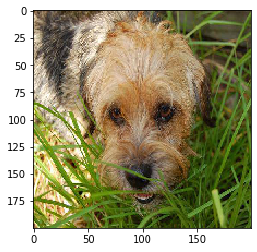

In [344]:
num2 = len(archieve_test.namelist())
Id2 = []

for i in range(100):
    name = archieve_test.namelist()[i]
    image = Image.open(name)
    image = image.resize((200,200))
    pixel = np.array(image)
    plt.imshow(pixel)
    database2[i,:,:,:]=(pixel)/255
    Id2.append(name)

In [345]:
Y_pred = Breed.predict(database2)

In [346]:
Y_pred.shape

(100, 120)

In [348]:
Sub = pd.DataFrame(Y_pred)

In [349]:
Sub

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,0.007903,0.010339,0.008552,0.010152,0.007593,0.007493,0.009092,0.009667,0.007993,0.008756,...,0.008177,0.008059,0.007548,0.007257,0.008297,0.007897,0.008234,0.009186,0.008178,0.008048
1,0.007905,0.010335,0.008550,0.010148,0.007595,0.007494,0.009089,0.009663,0.007995,0.008756,...,0.008178,0.008059,0.007550,0.007260,0.008297,0.007898,0.008235,0.009184,0.008179,0.008049
2,0.007904,0.010337,0.008551,0.010150,0.007594,0.007494,0.009091,0.009665,0.007994,0.008756,...,0.008178,0.008059,0.007549,0.007259,0.008297,0.007897,0.008234,0.009185,0.008178,0.008048
3,0.007903,0.010341,0.008552,0.010154,0.007593,0.007492,0.009092,0.009668,0.007992,0.008756,...,0.008177,0.008059,0.007548,0.007257,0.008297,0.007896,0.008234,0.009187,0.008177,0.008048
4,0.007904,0.010337,0.008551,0.010150,0.007594,0.007493,0.009090,0.009665,0.007994,0.008756,...,0.008178,0.008059,0.007549,0.007259,0.008297,0.007897,0.008234,0.009185,0.008178,0.008048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.007903,0.010339,0.008552,0.010152,0.007593,0.007493,0.009091,0.009666,0.007993,0.008756,...,0.008177,0.008059,0.007548,0.007258,0.008297,0.007897,0.008234,0.009186,0.008178,0.008048
96,0.007903,0.010338,0.008551,0.010151,0.007594,0.007493,0.009091,0.009665,0.007993,0.008756,...,0.008177,0.008059,0.007549,0.007258,0.008297,0.007897,0.008234,0.009186,0.008178,0.008048
97,0.007903,0.010340,0.008552,0.010153,0.007593,0.007492,0.009092,0.009667,0.007992,0.008756,...,0.008177,0.008059,0.007548,0.007257,0.008297,0.007896,0.008234,0.009187,0.008178,0.008048
98,0.007902,0.010344,0.008554,0.010157,0.007592,0.007491,0.009094,0.009670,0.007991,0.008756,...,0.008176,0.008059,0.007547,0.007255,0.008297,0.007895,0.008233,0.009188,0.008177,0.008047


In [350]:
Sub.columns = [Names]

In [351]:
Sub

,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,0.007903,0.010339,0.008552,0.010152,0.007593,0.007493,0.009092,0.009667,0.007993,0.008756,...,0.008177,0.008059,0.007548,0.007257,0.008297,0.007897,0.008234,0.009186,0.008178,0.008048
1,0.007905,0.010335,0.008550,0.010148,0.007595,0.007494,0.009089,0.009663,0.007995,0.008756,...,0.008178,0.008059,0.007550,0.007260,0.008297,0.007898,0.008235,0.009184,0.008179,0.008049
2,0.007904,0.010337,0.008551,0.010150,0.007594,0.007494,0.009091,0.009665,0.007994,0.008756,...,0.008178,0.008059,0.007549,0.007259,0.008297,0.007897,0.008234,0.009185,0.008178,0.008048
3,0.007903,0.010341,0.008552,0.010154,0.007593,0.007492,0.009092,0.009668,0.007992,0.008756,...,0.008177,0.008059,0.007548,0.007257,0.008297,0.007896,0.008234,0.009187,0.008177,0.008048
4,0.007904,0.010337,0.008551,0.010150,0.007594,0.007493,0.009090,0.009665,0.007994,0.008756,...,0.008178,0.008059,0.007549,0.007259,0.008297,0.007897,0.008234,0.009185,0.008178,0.008048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.007903,0.010339,0.008552,0.010152,0.007593,0.007493,0.009091,0.009666,0.007993,0.008756,...,0.008177,0.008059,0.007548,0.007258,0.008297,0.007897,0.008234,0.009186,0.008178,0.008048
96,0.007903,0.010338,0.008551,0.010151,0.007594,0.007493,0.009091,0.009665,0.007993,0.008756,...,0.008177,0.008059,0.007549,0.007258,0.008297,0.007897,0.008234,0.009186,0.008178,0.008048
97,0.007903,0.010340,0.008552,0.010153,0.007593,0.007492,0.009092,0.009667,0.007992,0.008756,...,0.008177,0.008059,0.007548,0.007257,0.008297,0.007896,0.008234,0.009187,0.008178,0.008048
98,0.007902,0.010344,0.008554,0.010157,0.007592,0.007491,0.009094,0.009670,0.007991,0.008756,...,0.008176,0.008059,0.007547,0.007255,0.008297,0.007895,0.008233,0.009188,0.008177,0.008047


In [356]:
Sub.rows= [archieve_test.namelist()[0:100]]

C:\Users\SHALIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [357]:
Sub['Id'] = 

,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,0.007903,0.010339,0.008552,0.010152,0.007593,0.007493,0.009092,0.009667,0.007993,0.008756,...,0.008177,0.008059,0.007548,0.007257,0.008297,0.007897,0.008234,0.009186,0.008178,0.008048
1,0.007905,0.010335,0.008550,0.010148,0.007595,0.007494,0.009089,0.009663,0.007995,0.008756,...,0.008178,0.008059,0.007550,0.007260,0.008297,0.007898,0.008235,0.009184,0.008179,0.008049
2,0.007904,0.010337,0.008551,0.010150,0.007594,0.007494,0.009091,0.009665,0.007994,0.008756,...,0.008178,0.008059,0.007549,0.007259,0.008297,0.007897,0.008234,0.009185,0.008178,0.008048
3,0.007903,0.010341,0.008552,0.010154,0.007593,0.007492,0.009092,0.009668,0.007992,0.008756,...,0.008177,0.008059,0.007548,0.007257,0.008297,0.007896,0.008234,0.009187,0.008177,0.008048
4,0.007904,0.010337,0.008551,0.010150,0.007594,0.007493,0.009090,0.009665,0.007994,0.008756,...,0.008178,0.008059,0.007549,0.007259,0.008297,0.007897,0.008234,0.009185,0.008178,0.008048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.007903,0.010339,0.008552,0.010152,0.007593,0.007493,0.009091,0.009666,0.007993,0.008756,...,0.008177,0.008059,0.007548,0.007258,0.008297,0.007897,0.008234,0.009186,0.008178,0.008048
96,0.007903,0.010338,0.008551,0.010151,0.007594,0.007493,0.009091,0.009665,0.007993,0.008756,...,0.008177,0.008059,0.007549,0.007258,0.008297,0.007897,0.008234,0.009186,0.008178,0.008048
97,0.007903,0.010340,0.008552,0.010153,0.007593,0.007492,0.009092,0.009667,0.007992,0.008756,...,0.008177,0.008059,0.007548,0.007257,0.008297,0.007896,0.008234,0.009187,0.008178,0.008048
98,0.007902,0.010344,0.008554,0.010157,0.007592,0.007491,0.009094,0.009670,0.007991,0.008756,...,0.008176,0.008059,0.007547,0.007255,0.008297,0.007895,0.008233,0.009188,0.008177,0.008047


In [359]:
Sub.insert(0, column='Id', value=archieve_test.namelist()[0:100])

In [360]:
Sub

,Id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,test/000621fb3cbb32d8935728e48679680e.jpg,0.007903,0.010339,0.008552,0.010152,0.007593,0.007493,0.009092,0.009667,0.007993,...,0.008177,0.008059,0.007548,0.007257,0.008297,0.007897,0.008234,0.009186,0.008178,0.008048
1,test/00102ee9d8eb90812350685311fe5890.jpg,0.007905,0.010335,0.008550,0.010148,0.007595,0.007494,0.009089,0.009663,0.007995,...,0.008178,0.008059,0.007550,0.007260,0.008297,0.007898,0.008235,0.009184,0.008179,0.008049
2,test/0012a730dfa437f5f3613fb75efcd4ce.jpg,0.007904,0.010337,0.008551,0.010150,0.007594,0.007494,0.009091,0.009665,0.007994,...,0.008178,0.008059,0.007549,0.007259,0.008297,0.007897,0.008234,0.009185,0.008178,0.008048
3,test/001510bc8570bbeee98c8d80c8a95ec1.jpg,0.007903,0.010341,0.008552,0.010154,0.007593,0.007492,0.009092,0.009668,0.007992,...,0.008177,0.008059,0.007548,0.007257,0.008297,0.007896,0.008234,0.009187,0.008177,0.008048
4,test/001a5f3114548acdefa3d4da05474c2e.jpg,0.007904,0.010337,0.008551,0.010150,0.007594,0.007493,0.009090,0.009665,0.007994,...,0.008178,0.008059,0.007549,0.007259,0.008297,0.007897,0.008234,0.009185,0.008178,0.008048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,test/021ad1825ea4fc5c0af6edc805fbcb8e.jpg,0.007903,0.010339,0.008552,0.010152,0.007593,0.007493,0.009091,0.009666,0.007993,...,0.008177,0.008059,0.007548,0.007258,0.008297,0.007897,0.008234,0.009186,0.008178,0.008048
96,test/02215f26ca6ece8786daecc15c60e774.jpg,0.007903,0.010338,0.008551,0.010151,0.007594,0.007493,0.009091,0.009665,0.007993,...,0.008177,0.008059,0.007549,0.007258,0.008297,0.007897,0.008234,0.009186,0.008178,0.008048
97,test/0223272e92ee6b7e9fc4cf48dbd7d167.jpg,0.007903,0.010340,0.008552,0.010153,0.007593,0.007492,0.009092,0.009667,0.007992,...,0.008177,0.008059,0.007548,0.007257,0.008297,0.007896,0.008234,0.009187,0.008178,0.008048
98,test/023c0a9675c4e09e7de76be0fad3d52f.jpg,0.007902,0.010344,0.008554,0.010157,0.007592,0.007491,0.009094,0.009670,0.007991,...,0.008176,0.008059,0.007547,0.007255,0.008297,0.007895,0.008233,0.009188,0.008177,0.008047
